Submission Project</br>
Proyek Pertama : Membuat Model NLP dengan TensorFlow</br> </br>

Data profile </br>
Nama : Handerson Loriano</br>
Email : hadezbladez@gmail.com

In [47]:
# lib import
import pandas as pd
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
import tensorflow as tf


from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

In [48]:
df = pd.read_csv('/content/all-weeks-global.csv')
df = df.drop(columns=["week","weekly_rank","season_title","weekly_hours_viewed","cumulative_weeks_in_top_10"])
df.head(100)

,category,show_title
0,Films (English),Day Shift
1,Films (English),Look Both Ways
2,Films (English),The Next 365 Days
3,Films (English),Purple Hearts
4,Films (English),Untold: The Girlfriend Who Didn't Exist
...,...,...
95,Films (Non-English),Too Old for Fairy Tales
96,Films (Non-English),Buba
97,Films (Non-English),Blood Red Sky
98,Films (Non-English),RRR (Hindi)


In [49]:
category = pd.get_dummies(df.category)
df_baru = pd.concat([df, category], axis=1)
df_baru = df_baru.drop(columns='category')
df_baru

,show_title,Films (English),Films (Non-English),TV (English),TV (Non-English)
0,Day Shift,1,0,0,0
1,Look Both Ways,1,0,0,0
2,The Next 365 Days,1,0,0,0
3,Purple Hearts,1,0,0,0
4,Untold: The Girlfriend Who Didn't Exist,1,0,0,0
...,...,...,...,...,...
2395,Elite,0,0,0,1
2396,Elite,0,0,0,1
2397,Elite,0,0,0,1
2398,Katla,0,0,0,1


In [50]:
description = df_baru['show_title'].values
label = df_baru[["Films (English)",	"Films (Non-English)", "TV (English)",	"TV (Non-English)"]].values

description_latih, description_test, label_latih, label_test = train_test_split(description, label, test_size=0.2)

In [54]:
tokenizer = Tokenizer(num_words=225, oov_token='<oov>')
tokenizer.fit_on_texts(description_latih)
tokenizer.fit_on_texts(description_test)

sekuens_latih = tokenizer.texts_to_sequences(description_latih)
sekuens_test = tokenizer.texts_to_sequences(description_test)

padded_latih = pad_sequences(sekuens_latih, padding='post', maxlen=23, truncating='post')
padded_test = pad_sequences(sekuens_test, padding='post', maxlen=23, truncating='post')

In [59]:
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(input_dim=225, output_dim=32),
    tf.keras.layers.Dense(4096, activation='relu'),
    tf.keras.layers.LSTM(128),
    tf.keras.layers.Dense(1024, activation='relu'),
    tf.keras.layers.Dropout(0.31),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dropout(0.1),
    tf.keras.layers.Dense(4, activation='softmax')
])
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])
num_epochs = 619

class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if(logs.get('val_accuracy') > 0.75):
      print("\nVal Akurasi telah mencapai >75%!")
      self.model.stop_training = True
mmcallbacks = myCallback()


In [60]:
history = model.fit(padded_latih, label_latih, epochs=num_epochs, callbacks=[mmcallbacks],
                    validation_data=(padded_test, label_test), verbose=2)

Epoch 1/619
60/60 - 32s - loss: 1.3883 - accuracy: 0.2505 - val_loss: 1.3882 - val_accuracy: 0.2208 - 32s/epoch - 532ms/step
Epoch 2/619
60/60 - 29s - loss: 1.3101 - accuracy: 0.3214 - val_loss: 1.1361 - val_accuracy: 0.3771 - 29s/epoch - 481ms/step
Epoch 3/619
60/60 - 28s - loss: 1.0165 - accuracy: 0.5229 - val_loss: 0.9641 - val_accuracy: 0.5562 - 28s/epoch - 473ms/step
Epoch 4/619
60/60 - 28s - loss: 0.9443 - accuracy: 0.5484 - val_loss: 0.9944 - val_accuracy: 0.5708 - 28s/epoch - 466ms/step
Epoch 5/619
60/60 - 29s - loss: 0.9377 - accuracy: 0.5490 - val_loss: 0.9620 - val_accuracy: 0.5146 - 29s/epoch - 478ms/step
Epoch 6/619
60/60 - 27s - loss: 0.9111 - accuracy: 0.5526 - val_loss: 0.9355 - val_accuracy: 0.5354 - 27s/epoch - 457ms/step
Epoch 7/619
60/60 - 28s - loss: 0.9163 - accuracy: 0.5714 - val_loss: 0.9789 - val_accuracy: 0.5854 - 28s/epoch - 474ms/step
Epoch 8/619
60/60 - 28s - loss: 0.8923 - accuracy: 0.5906 - val_loss: 0.8847 - val_accuracy: 0.5958 - 28s/epoch - 471ms/step


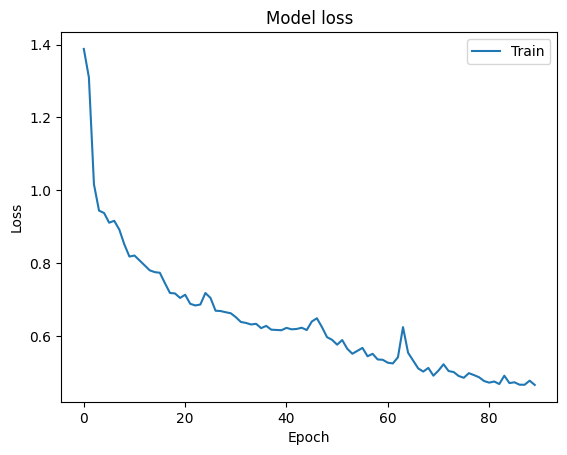

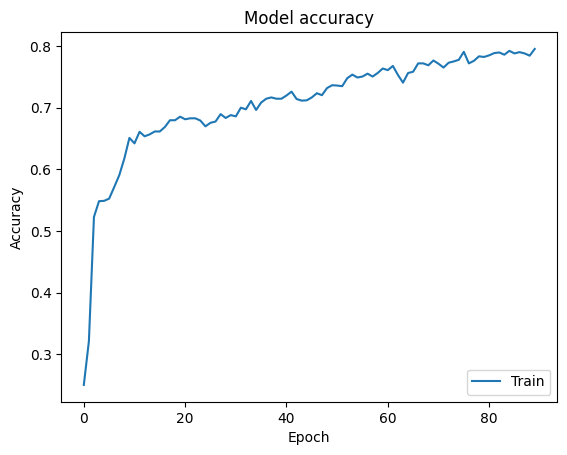

In [61]:
#plot loss
plt.plot(history.history['loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train'], loc='upper right')
plt.show()

#plot accuracy
plt.plot(history.history['accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train'], loc='lower right')
plt.show()

In [62]:
print(tokenizer.word_index)
print(tokenizer.texts_to_sequences(['As someone']))

{'<oov>': 1, 'the': 2, 'of': 3, 'in': 4, 'a': 5, 'love': 6, 'my': 7, '2': 8, 'and': 9, 'de': 10, 'cha': 11, 'to': 12, 'stranger': 13, 'things': 14, 'heist': 15, 'man': 16, 'money': 17, 'yo': 18, 'soy': 19, 'betty': 20, 'la': 21, 'fea': 22, 'manifest': 23, 'red': 24, 'good': 25, 'all': 26, 'queen': 27, 'newly': 28, 'from': 29, 'flow': 30, 'last': 31, 'café': 32, 'con': 33, 'aroma': 34, 'mujer': 35, 'girl': 36, 'hindi': 37, 'our': 38, 'is': 39, 'i': 40, 'for': 41, 'perfect': 42, 'christmas': 43, 'game': 44, 'ozark': 45, 'el': 46, 'life': 47, 'squid': 48, 'twenty': 49, 'dead': 50, 'you': 51, 'me': 52, 'sex': 53, 'one': 54, 'street': 55, 'part': 56, '3': 57, 'doctor': 58, 'with': 59, 'us': 60, 'window': 61, 'bridgerton': 62, 'blood': 63, 'summer': 64, 'hometown': 65, 'five': 66, 'boy': 67, 'virgin': 68, 'river': 69, 'black': 70, 'sky': 71, 'lost': 72, 'carinha': 73, 'anjo': 74, 'on': 75, 'family': 76, 'too': 77, 'it': 78, 'notice': 79, 'secret': 80, 'rich': 81, 'rrr': 82, 'elite': 83, 'swe